# **Health Insurance Price prediction using Machine Learning in Python**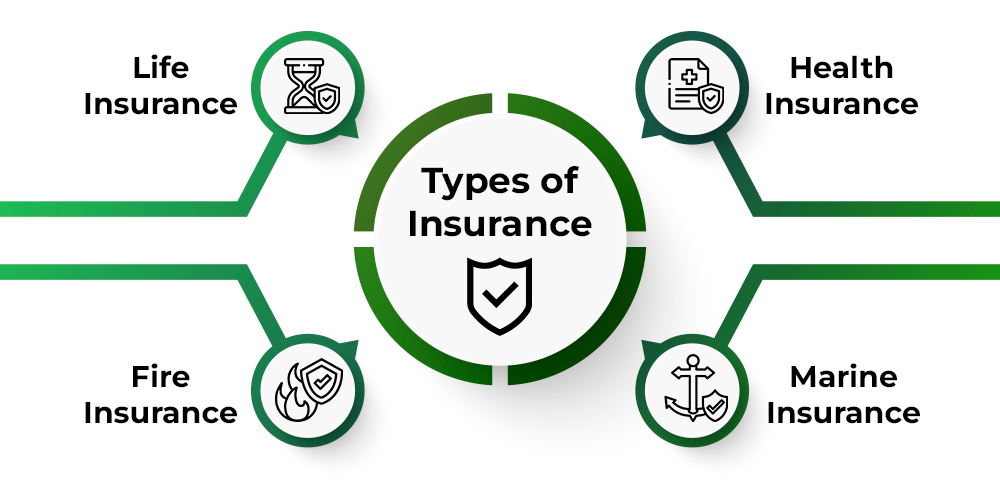


A sector that is quickly growing globally is digital health. The number of digital health businesses has doubled globally during the last five years. Health insurance faces two significant obstacles in industrialized nations: growing health care costs and an increase in the number of people without coverage. Individual health insurance plays a crucial role in the healthcare system, particularly for people with rare diseases, for whom medical and preventative insurance can help cut down on treatment expenses. The world in which we live is a dangerous and unknowable place. houses, companies, buildings. These dangers include the potential for disease, death, and loss of assets or goods. People's happiness and health are fundamental to their existence. However, as risks cannot always be avoided, the financial industry has developed a number of products to shield people and businesses from them. These products employ money to make up for the risks; as a result, the costs of some risks are reduced or even eliminated. A crucial component of the medical industry is medical insurance. On the other hand, it is challenging to predict medical spending because most of the money comes from patients with rare conditions. Numerous ML algorithms are used for data prediction. The factors of training time and accuracy are looked at. The bulk of machine learning algorithms only require a brief time of training.

# **Importing Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("/content/Health_insurance_cost .xlsx")
df


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# **Datatype in the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**From the above, we can see that the dataset contains 3 columns with float values 3 with categorical values and the rest contains integer values.**

---



# **Statistical Information**

In [ ]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


**We can look at the descriptive statistical measures of the continuous data available in the dataset.**

# **Exploratory Data Analysis**
 EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

# **To find the missing values in the dataset**

In [ ]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

**There is missing values in the column age, BMI and health_insurance_price**

# **Copy of the dataset**

In [ ]:
df1=df.copy()

# **Detecting Outliers  - Boxplot, IQR,z-score, percentile**

<Axes: ylabel='health_insurance_price'>

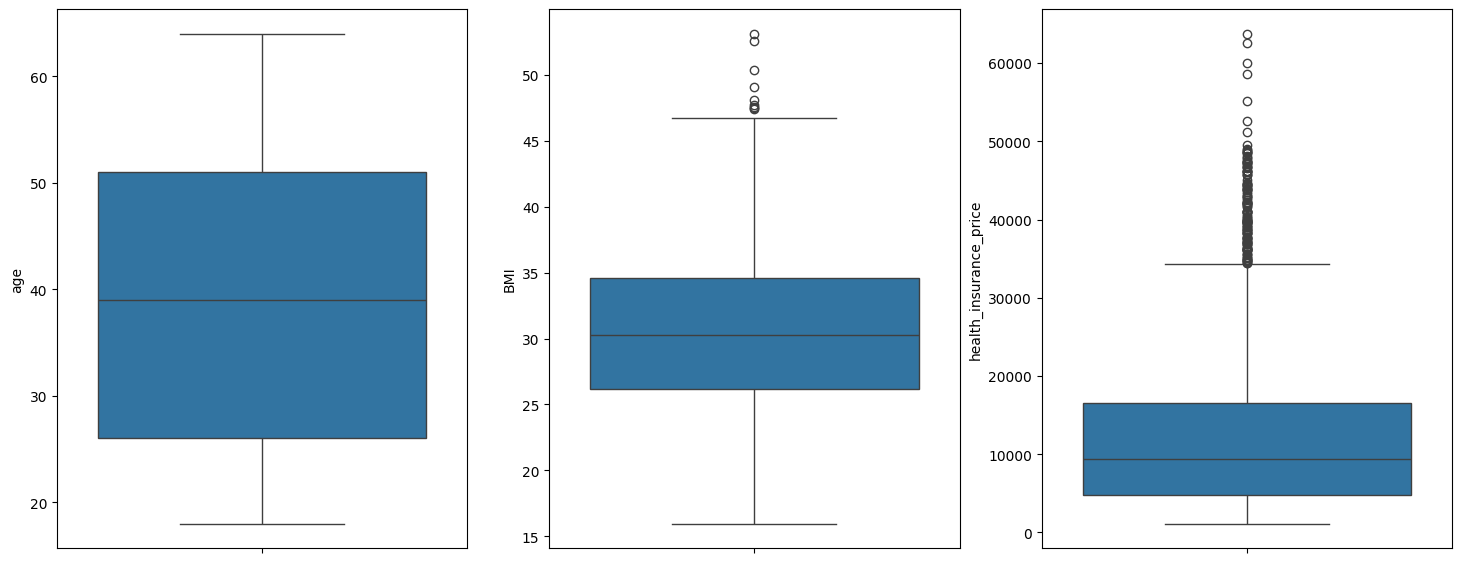

In [ ]:
#check outliers for age, BMI and health_insurance_price
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
sns.boxplot(df["age"])  #no outliers - mean
plt.subplot(1,3,2)
sns.boxplot(df["BMI"])  # Outliers - median
plt.subplot(1,3,3)
sns.boxplot(df["health_insurance_price"])  # Outliers - median

# **Handling missing values - Imputation Technique**

*   Univariate Imputation Technique - Mean, Median, Mode
*   Bivariate Imputation Technique- KNN, MICE


In [ ]:
#To fill the missing values and assign back to original column
df1["age"]=df["age"].fillna(df["age"].mean())
df1["BMI"]=df["BMI"].fillna(df["BMI"].median())
df1["health_insurance_price"]=df["health_insurance_price"].fillna(df["health_insurance_price"].median())


*   Age column is filled with mean which has no outliers in  boxplot
*   BMI column is filled with median which has outliers in boxplot
*   Health_insurance_price is filled with median which also has outliers in boxplot








# **Rechecking the null values or missing values after filling the missing values**

In [ ]:
df1.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

**So, here we can conclude that there are no null values in the dataset given.**
**Missing values are fixed but it will not impact the outliers in boxplot which have to be treated - Done in Data Preprocessing**

# **Checking distribution of data using piechart - Univariate Categorical variable in dataset**

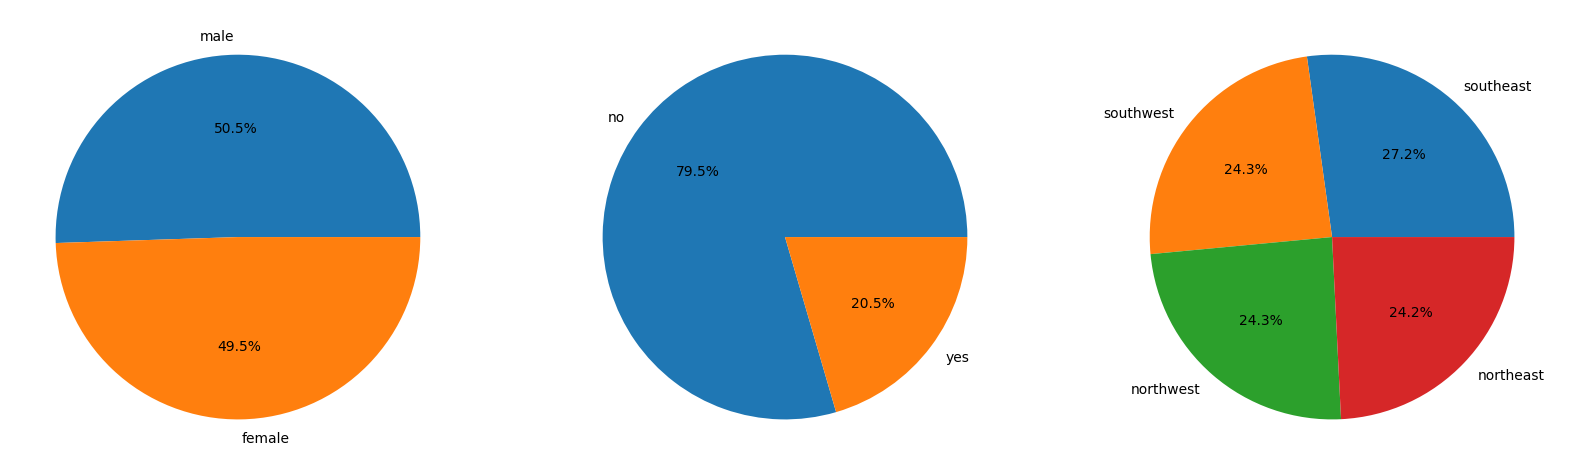

In [ ]:
import matplotlib.pyplot as plt

features = ['gender','smoking_status','location']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df1[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

**The data provided to us is equally distributed among the gender and the location columns but in the smoking_status column, we can observe a ratio of 80:20.**

# **Comparison between health_insurance_price paid between different groups**

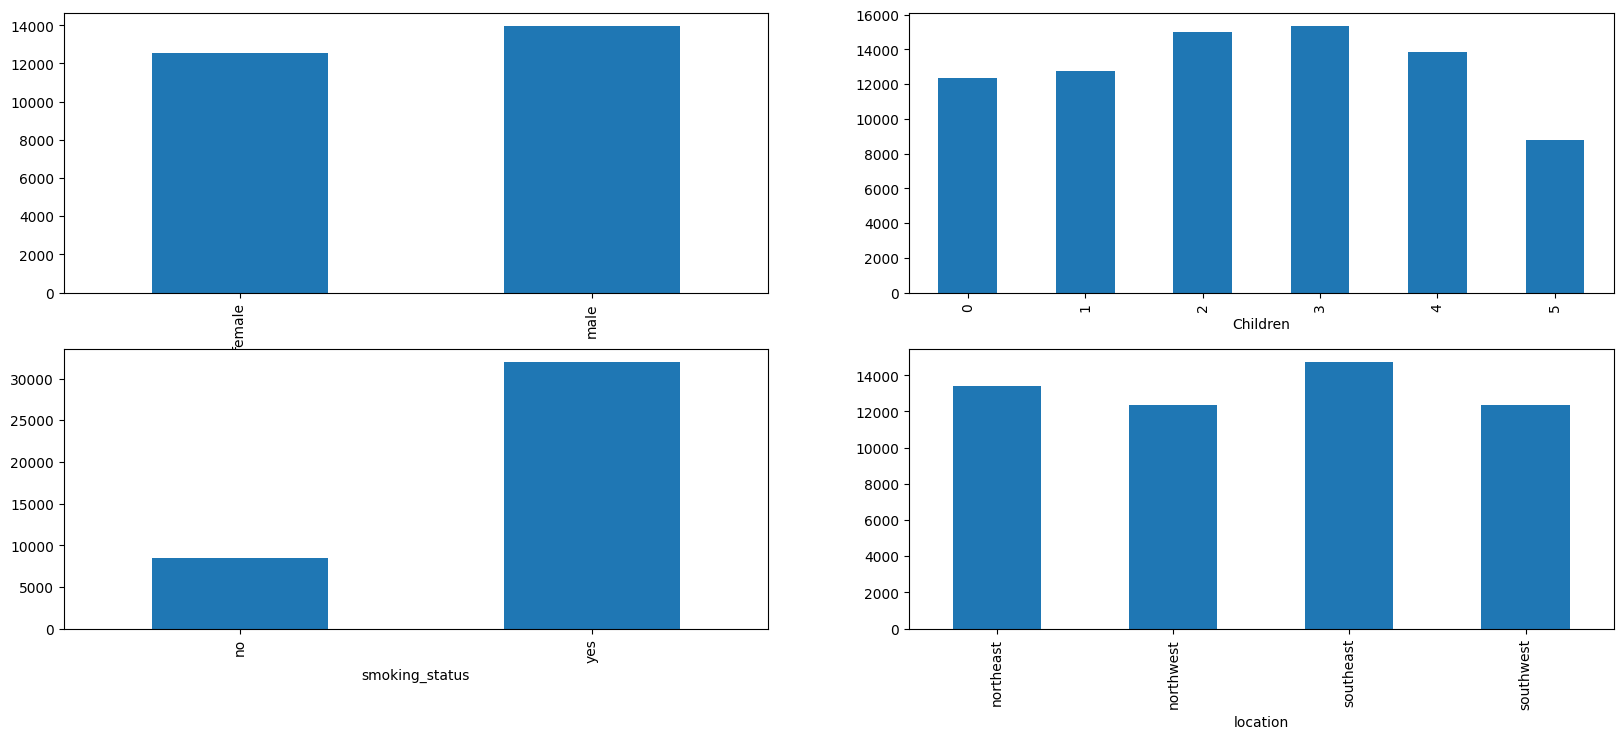

In [ ]:
features = ['gender','Children','smoking_status','location']

plt.subplots(figsize=(20, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df1.groupby(col).mean()['health_insurance_price'].plot.bar()

plt.show()

1.**Now let’s look at some of the observations which are shown in the above graphs:**

2.**Health Insurance Prices are on the higher side for males as compared to females but the difference is not that much.**

3.**Premium charged from the smoker is around thrice that which is charged from non-smokers.**

4.**Health Insurance Prices are approximately the same in the given four locations.**

# **Impact of Health Insurance price based on the age, BMI and smoking status**

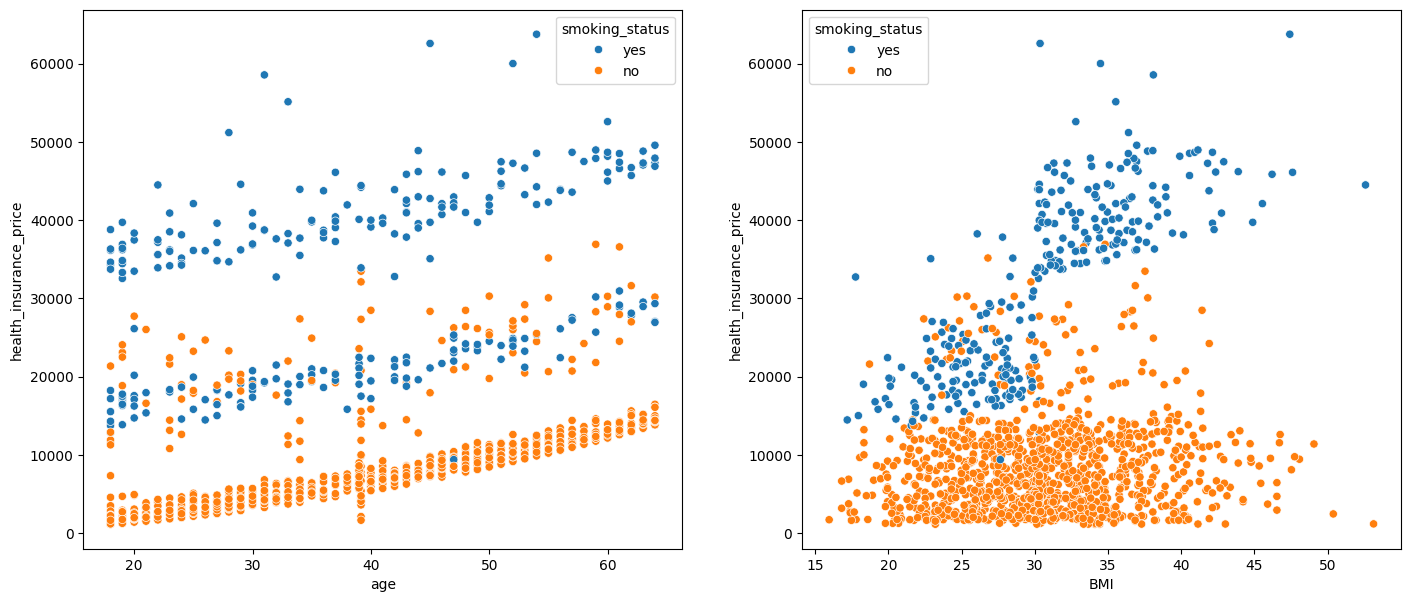

In [ ]:
features = ['age', 'BMI']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df1, x=col,
                   y='health_insurance_price',
                   hue='smoking_status')
plt.show()

**A clear distinction can be observed here between the health insurance prices that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.**

# **DATA PREPROCESSING**

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: ylabel='age'>

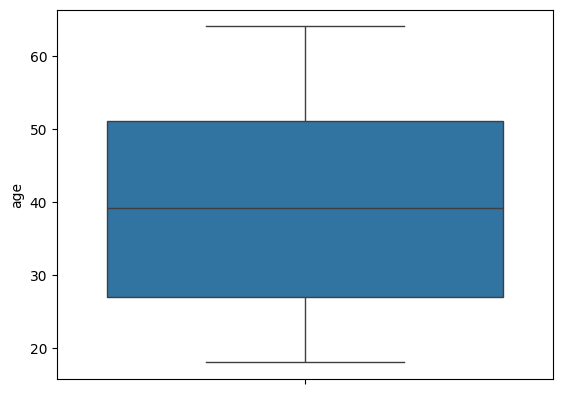

In [ ]:
df1.drop_duplicates(inplace=True)
sns.boxplot(df1['age'])

<Axes: ylabel='BMI'>

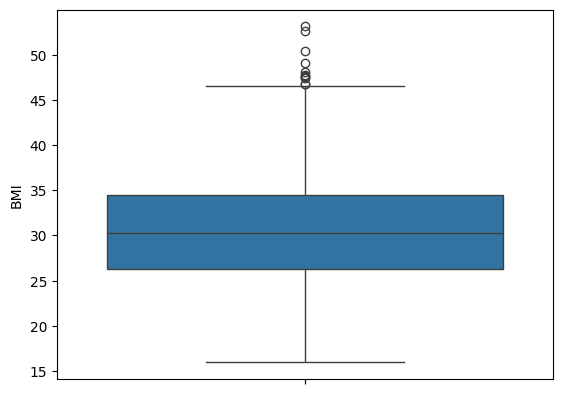

In [ ]:
sns.boxplot(df1['BMI'])

# **Treating Outliers -**
1. Check with client
2. Trimming(removing)
3.Capping (capping with lower limit and upper limit values) - used for this dataset

In [ ]:
Q1=df1['BMI'].quantile(0.25)
Q2=df1['BMI'].quantile(0.5)
Q3=df1['BMI'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

14.142500000000004
46.6025


In [ ]:
pip install feature_engine

<Axes: ylabel='BMI'>

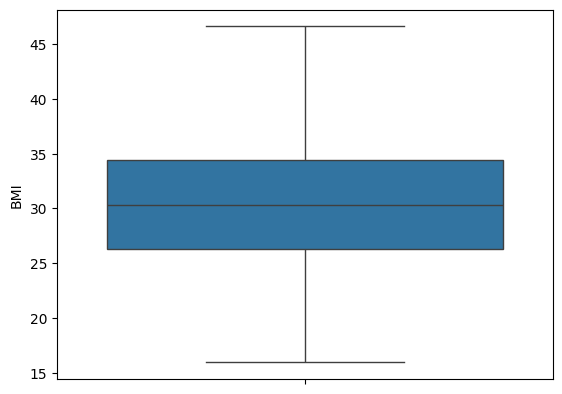

In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb=ArbitraryOutlierCapper(min_capping_dict={'BMI':14.1425},max_capping_dict={'BMI':46.6025})
df1[['BMI']]=arb.fit_transform(df1[['BMI']])
sns.boxplot(df1['BMI'])

**Now we successfully treated the outliers .**

# **Data Wrangling**

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [ ]:
df1['BMI'].skew()


0.23831812031234312

In [ ]:
df1['age'].skew()


0.057132152151711656

**Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.**

# **Probability distribution - Histogram(numerical variable)**

<Axes: xlabel='BMI', ylabel='Count'>

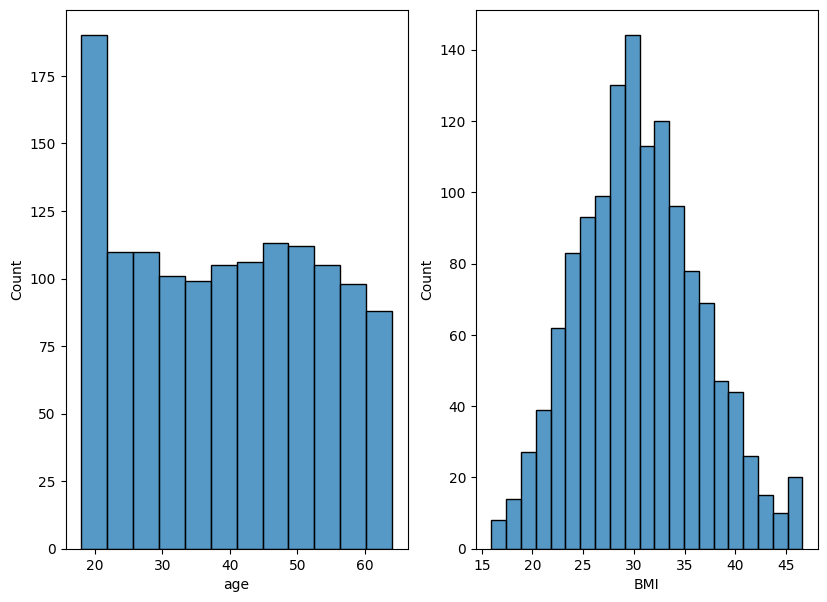

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(df1["age"]) # Discrete Uniform - Known as the equally likely outcomes distribution, where the distribution has a set of N elements, then each element has the same probability, creating a flat distribution. This distribution is related to the uniform distribution but its elements are discrete and not continuous. Minimum < Maximum, and both are integers.
plt.subplot(1,3,2)
sns.histplot(df1["BMI"]) # normal distribution.


# **Hypothesis**

Null Hypothesis Ho: There is no significant relationship between the gender and smoking_status column. i.e. if p_value > 0.05

Alternate Hypothesis Ha: There is significant relationship between the gender and smoking_status column. i.e. if p_value < 0.05

In [ ]:
#pandas crosstab for chisqure test(categorical-categorical)
pd.crosstab(df1["gender"],df1["smoking_status"])

smoking_status,no,yes
gender,,
female,547,115
male,516,159


In [ ]:
from scipy import stats
observed_values=[[547,115],[517,159]]
expected_values=stats.chi2_contingency(observed_values)
expected_values

Chi2ContingencyResult(statistic=7.39291081459996, pvalue=0.006548143503580696, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))

In [ ]:
stats,p_value,a,b=expected_values

In [ ]:
alpha=0.05
if p_value>alpha:
  print(f"with p_value as {p_value,10} we conclude that there is no significant relationship between the gender and smoking_status column.")
else:
  print(f"with p_value as {p_value} we conclude that there is significant relationship between the gender and smoking_status column.")

with p_value as 0.006548143503580696 we conclude that there is significant relationship between the gender and smoking_status column.


# **Encoding**

encoding is to be done for discrete categorical data (gender,smoking_status,location).

In [ ]:
df1['gender']=df1['gender'].map({'male':0,'female':1})
df1['smoking_status']=df1['smoking_status'].map({'yes':1,'no':0})
df1['location']=df1['location'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [ ]:
df1.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,30.305,0,1,3,16884.92400
1,18.0,0,33.770,1,0,2,1725.55230
2,28.0,0,33.000,3,0,2,4449.46200
3,33.0,0,22.705,0,0,0,21984.47061
4,32.0,0,28.880,0,0,0,3866.85520


**Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development**

# **Pandas dataframe. corr() is used to find the pairwise correlation of all columns in the Dataframe.**

In [ ]:
df1.corr()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,0.016292,0.110611,0.040125,-0.021987,0.008051,0.293719
gender,0.016292,1.000000,-0.045701,-0.017848,-0.076596,-0.008998,-0.059313
BMI,0.110611,-0.045701,1.000000,0.010756,0.002685,0.153997,0.194865
Children,0.040125,-0.017848,0.010756,1.000000,0.007331,-0.002842,0.066692
smoking_status,-0.021987,-0.076596,0.002685,0.007331,1.000000,0.012736,0.785585
location,0.008051,-0.008998,0.153997,-0.002842,0.012736,1.000000,0.012459
health_insurance_price,0.293719,-0.059313,0.194865,0.066692,0.785585,0.012459,1.000000


**Correlation analysis assumes that the relationship between variables is linear and follows a normal distribution.**

# **Display Correlation Matrix in heatmap**

                             age       BMI  Children  health_insurance_price
age                     1.000000  0.110611  0.040125                0.293719
BMI                     0.110611  1.000000  0.010756                0.194865
Children                0.040125  0.010756  1.000000                0.066692
health_insurance_price  0.293719  0.194865  0.066692                1.000000


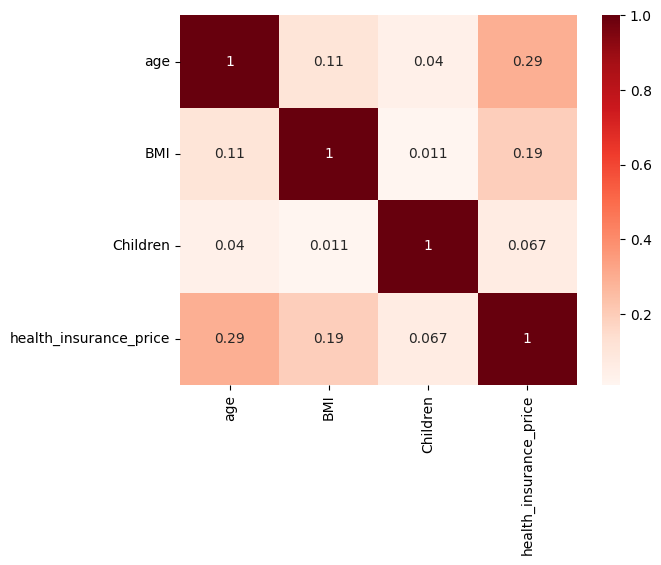

In [ ]:
import seaborn as sns
print(df1.corr())
sns.heatmap(df1.corr(), annot = True, cmap = "Reds")
plt.show()

# **Model Development**
**There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.**

In [ ]:
X=df1.drop(['health_insurance_price'],axis=1)
Y=df1[['health_insurance_price']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)

In [ ]:
model_df=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
model_df

,train acc,test acc,cvs
0,0.736650,0.759070,0.738975
1,0.747388,0.703212,0.738975
2,0.720847,0.799280,0.738975
3,0.745962,0.725342,0.738975
4,0.739407,0.751746,0.738975
5,0.748784,0.705235,0.738975
6,0.734973,0.762615,0.738975
7,0.723378,0.789003,0.738975
8,0.742017,0.741505,0.738975
9,0.746386,0.721513,0.738975


**After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.**

# **Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.**


# **Linear Regression:**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(f"Linear Regression:")
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression:
0.7208465956670184
0.799279869604204
0.7389751664795726


# **Support Vector Regressor:**

In [ ]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)

In [ ]:
print(f"Support Vector Regressor:")
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

Support Vector Regressor:
-0.09770382269257549
-0.13107501797498888
-0.1030229883713761


# **Random Forest Regressor:**

In [ ]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(f"RandomForestRegressor:")
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(f"Hyperparametertuning:")
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


RandomForestRegressor:
0.9713995960438355
0.8748839223913615
0.8211698936658388
Hyperparametertuning:
{'n_estimators': 120}
0.9722374978686685
0.8747007016666295
0.8209552549419661


# **Gradient Boosting Regressor**

In [ ]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(f"GradientBoostingRegressor:")
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(f"Hyperparametertuning:")
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

GradientBoostingRegressor:
0.883930313299736
0.8956658090572263
0.8412062180233486
Hyperparametertuning:
{'learning_rate': 0.2, 'n_estimators': 20}
0.860390814036871
0.892872766142029
0.8459798172326009


# **XGBoost Regressor**

In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(f"XGBRegressor:")
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(f"Hyperparametertuning:")
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

XGBRegressor:
0.9951657609062321
0.8511956278019626
0.7934018674140615
Hyperparametertuning:
{'gamma': 0, 'max_depth': 4, 'n_estimators': 10}
0.8602254570556508
0.8975542872914215
0.8500390356659292


# **Comparing all models**

In [ ]:
model_accuracy=pd.read_excel(r"/content/model accuracy comparison.xlsx")
model_accuracy

,Linear Regression,0.72,0.79,0.73
0,Model,Train Accuracy,Test Accuracy,CV score
1,Support Vector Machine,-0.09,-0.13,-0.1
2,Random Forest,0.97,0.87,0.82
3,Gradient Boost,0.86,0.89,0.84
4,XGBoost,0.86,0.89,0.85


# **Important Feature estimator for the final model**

In [ ]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.025078
gender,0.004560
BMI,0.047259
Children,0.007998
smoking_status,0.907272
location,0.007832


In [ ]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.025078
BMI,0.047259
smoking_status,0.907272


# **Final Model**

In [ ]:
df1.drop(df[['gender','location']],axis=1,inplace=True)
Xf=df1.drop(df[['health_insurance_price']],axis=1)
X=df1.drop(df[['health_insurance_price']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel1=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel1.fit(xtrain,ytrain)
ypredtrain4=finalmodel1.predict(xtrain)
ypredtest4=finalmodel1.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel1,X,Y,cv=5,).mean())

0.8594941706826513
0.8960989199196231
0.8490899886736576


In [ ]:
print(f"Final Model:")
print(f"Train accuracy : {r2_score(ytrain,ypredtrain4)}")
print(f"Test accuracy  : {r2_score(ytest,ypredtest4)}")
print(f"CV Score       : {cross_val_score(finalmodel,X,Y,cv=5,).mean()}")

Final Model:
Train accuracy : 0.8594941706826513
Test accuracy  : 0.8960989199196231
CV Score       : 0.8490899886736576


# **Save Model:**

In [ ]:
from pickle import dump
dump(finalmodel1,open('insurancemodelf.pkl','wb'))

# **Predict on new data:**

In [ ]:
new_data=pd.DataFrame({'age':19,'gender':'male','BMI':27.9,'Children':0,'smoking_status':'yes','location':'northeast'},index=[0])
new_data['smoking_status']=new_data['smoking_status'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['gender','location']],axis=1)
finalmodel1.predict(new_data)

array([18134.191], dtype=float32)

# **Conclusion**
Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

# **-----------------------Thank You-------------------------------**